In [27]:
from nltk import word_tokenize
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [38]:

all_comments = {}
for subreddit in subreddits:
    all_comments[subreddit] = pickle.load(open("reddit-top-1000-post-comments-" + subreddit + ".p", "rb"))
    print subreddit , len(all_comments[subreddit])

soccer 39005
liverpoolfc 7363
reddevils 6606
Gunners 6462
chelseafc 4617


In [39]:
import re
import unicodedata
comments_modified = {}
for subreddit in subreddits:
    this_comments_modified = []
    for comment in all_comments[subreddit]:
        comment_mod = unicodedata.normalize('NFKD', comment[1]).encode('ascii','ignore')
        comment_mod = re.sub(r"\n", "", comment_mod)
        comment_mod = re.sub(r"'s", "", comment_mod)
        if comment_mod != "[removed]":
            this_comments_modified.append([comment_mod, comment[0]])
    comments_modified[subreddit] = this_comments_modified
    print subreddit, len(comments_modified[subreddit])

soccer 38994
liverpoolfc 7333
reddevils 6604
Gunners 6400
chelseafc 4601


In [59]:
print comments_modified["liverpoolfc"][:20]
#print all_comments["liverpoolfc"][:5]
comment_tokens = {}
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

translate_table = dict((ord(char), None) for char in string.punctuation)

wordnet_lemmatizer = WordNetLemmatizer()
subreddits = ["liverpoolfc", "soccer", "Gunners", "reddevils", "chelseafc"]
for subreddit in subreddits:
    print subreddit
    comments = comments_modified[subreddit]
    this_tokens = []
    i = 0
    for comment in comments:
        if i%1000==0:
            print i
        i+=1
        tokens = word_tokenize(comment[0])
        tokens = [t.lower() for t in tokens]
        tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
        tokens = filter(lambda a: a not in stopwords.words('english'), tokens)
        tokens = [re.sub(r'[^\w\s]','',s) for s in tokens]
        tokens = filter(lambda a: len(a) > 2, tokens)
        this_tokens.append(tokens)
        
    comment_tokens[subreddit] = this_tokens
pickle.dump(comment_tokens, open("comment_tokens.p", "wb"))
#print comment_tokens["liverpoolfc"][:20]

[['Huge thanks to everyone who contributed. ', u'dp72lbc'], ['This the meet up point now then? ', u'dp7213g'], ["I'm just glad you went with unified instead of united.", u'dp72gu5'], ['"Sorry we had to take r/LiverpoolFC off... The Stone-Mason said it wouldn\'t fit" ', u'dp725sm'], ['Haha that boss', u'dp71sui'], ["It looks awesome in the Steven Gerrard section. I'll get more photos and a little video up when I can!", u'dp71u28'], ["That is great. Next time I get over to Anfield I'll def check it out.", u'dp71w7r'], ['No way! My mother bought me one for my birthday this last year and I can see it in the picture! I just sent her this and were both floored! I took her to her first game at Anfield (opener vs Stoke 13/14 Migs penalty save) and weve been planning to go back and see the stone in person. This just makes us want to go even more! Cheers reds!', u'dp78age'], ['I feel that bot should come along and correct the capital R/On my way to the ground now it dark but will take a look for

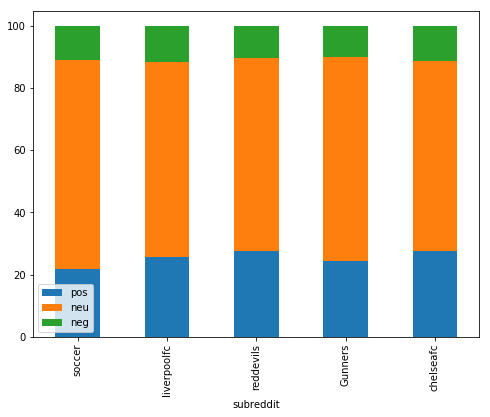

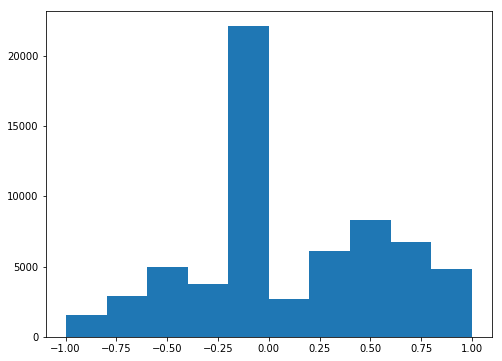

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

sid = SentimentIntensityAnalyzer()
df = pd.DataFrame(columns=('subreddit', 'pos', 'neu', 'neg'))
i=0
comps = []

for subreddit in subreddits:
    num_positive = 0
    num_negative = 0
    num_neutral = 0    
    comments = comments_modified[subreddit]
    for comment in comments:
        comp = sid.polarity_scores(comment[0])
        comp = comp['compound']
        comps.append([comment[0], comp])
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    df.loc[i] = (subreddit, percent_positive, percent_neutral, percent_negative)
    i+=1
    
df.plot.bar(x='subreddit', stacked=True)
plt.show() 

plt.hist([c[1] for c in comps])
plt.show()

In [26]:
df
#print comps[:10]

,subreddit,pos,neu,neg
0,soccer,21.736677,67.320613,10.942709
1,liverpoolfc,25.582981,62.702850,11.714169
2,reddevils,27.437916,62.295578,10.266505
3,Gunners,24.218750,65.671875,10.109375
4,chelseafc,27.472289,61.204086,11.323625


In [7]:
comments[0]
len(comments)
print [c[1] for c in comments[:50]]

[u'Huge thanks to everyone who contributed. ', u'This the meet up point now then? ', u"I'm just glad you went with unified instead of united.", u'"Sorry we had to take r/LiverpoolFC off... The Stone-Mason said it wouldn\'t fit" \U0001f440', u"Haha that's boss", u"It looks awesome in the Steven Gerrard section. \n\nI'll get more photos and a little video up when I can!", u"That is great. Next time I get over to Anfield I'll def check it out.", u'No way! My mother bought me one for my birthday this last year and I can see it in the picture! I just sent her this and we\u2019re both floored! I took her to her first game at Anfield (opener vs Stoke 13/14 Migs penalty save) and we\u2019ve been planning to go back and see the stone in person. This just makes us want to go even more! Cheers reds!', u"I feel that bot should come along and correct the capital R/\n\nOn my way to the ground now it's dark but will take a look for it", u'Palace fan here. Well done. \U0001f44f\U0001f3fc\U0001f44f\U00

In [4]:
comments[1]

(u'dp7213g', u'This the meet up point now then? ')

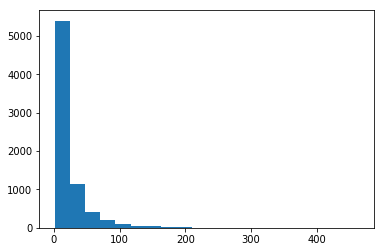

In [42]:
lens = []
tokens = []
for comment in comments:
    text = comment[1]
    words = text.split(" ")
    num_words = len(words)
    tokens.extend(words)
    lens.append(num_words)
plt.hist(lens, bins=20)
plt.show()    

In [43]:
from nltk.corpus import stopwords
tokens = [t.lower() for t in tokens]
tokens = filter(bool, tokens)
print len(tokens)

lematized_tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
#tokens[:150]

160940


In [52]:
final_tokens = filter(lambda a: a not in stopwords.words('english'), lematized_tokens)
from collections import Counter
bow = Counter(final_tokens)

In [53]:
print(bow.most_common(10))

[(u'wa', 1196), (u'like', 784), (u'get', 614), (u"it's", 536), (u'think', 526), (u'player', 518), (u"he's", 518), (u'would', 516), (u'good', 488), (u'ha', 475)]


In [10]:
numpy.median(lens)

13.0

In [11]:
comments[100]

(u'dp7hrpq',
 u'Comes to a football a sub to chat shit about football and then tells us to look in a mirror, haha, jog on lad.')

In [15]:
numpy.mean(lens)

22.212956675268234

In [16]:
len(comments)

7363

In [19]:
all_text = ""
for comment in comments:
    all_text += comment[1]
wordcloud = WordCloud(width=1000, height=500).generate(all_text)

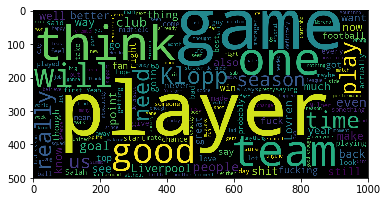

In [20]:
plt.imshow(wordcloud)